Performance Sensitivity Analysis

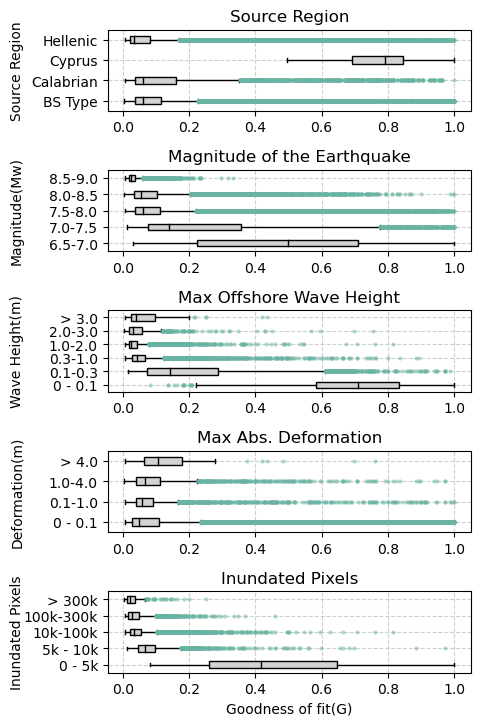

In [3]:
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import numpy as np

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
reg = 'CT'
if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

train_size = list_size[1]
eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')

eve_perf = eve_perf[eve_perf['split']=='test'] #filter test
# eve_perf = eve_perf[eve_perf['max_off']>0.1] #filter as training set
# eve_perf = eve_perf[eve_perf['l2n'] > 0.1]
# eve_perf = eve_perf[eve_perf['true'] > 10000]

mag_edges = np.arange(6.5, 9.5, 0.5)
dz_edges = [0,0.1,1,4,5]
area_edges = [0,5000,10000,100000,300000,600000]

eve_perf['mag_bin'] = pd.cut(eve_perf['Mag'], mag_edges)
eve_perf['dz_bin'] = pd.cut(eve_perf['max_absdz'], dz_edges)
eve_perf['area_bin'] = pd.cut(eve_perf['true'], area_edges)

# Create the figure and axes for each variable
fig, axs = plt.subplots(5,1,figsize=(5, 8))

# Titles for each subplot
titles = ['Source Region','Magnitude of the Earthquake','Max Offshore Wave Height','Max Abs. Deformation','Inundated Pixels']
yaxis_label= ['Source Region','Magnitude(Mw)','Wave Height(m)','Deformation(m)','Inundated Pixels']

eve_perf.boxplot(column='g', by='SR', vert=False, showfliers=True,
                 widths=0.35, patch_artist=True, ax=axs[0], 
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['BS Type','Calabrian','Cyprus','Hellenic']
axs[0].set_yticklabels(yticklabels)

eve_perf.boxplot(column='g', by='mag_bin', vert=False, showfliers=True,
                 widths=0.4, patch_artist=True, ax=axs[1],                
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['6.5-7.0','7.0-7.5','7.5-8.0','8.0-8.5','8.5-9.0']
axs[1].set_yticklabels(yticklabels)

# Plot horizontal boxplots
eve_perf.boxplot(column='g', by='max_off_bin', vert=False, showfliers=True,
                 widths=0.5, patch_artist=True, ax=axs[2],
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['0 - 0.1', '0.1-0.3', '0.3-1.0', '1.0-2.0', '2.0-3.0', '> 3.0']
axs[2].set_yticklabels(yticklabels)

eve_perf.boxplot(column='g', by='dz_bin', vert=False, showfliers=True,
                 widths=0.4, patch_artist=True, ax=axs[3],
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['0 - 0.1','0.1-1.0','1.0-4.0','> 4.0']
axs[3].set_yticklabels(yticklabels)

eve_perf.boxplot(column='g', by='area_bin', vert=False, showfliers=True,
                 widths=0.4, patch_artist=True, ax=axs[4],
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['0 - 5k','5k - 10k','10k-100k','100k-300k','> 300k']
axs[4].set_yticklabels(yticklabels)

# Set the titles for each subplot
for i, ax in enumerate(axs):
    ax.set_title(titles[i])
    ax.set_ylabel(None)
    ax.text(-0.25,0.5,yaxis_label[i],rotation=90,va='center',ha='center',transform=ax.transAxes)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_xlabel('Goodness of fit(G)')
    

# Adjust the layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Set the main title for the figure
fig.suptitle(None)

# Display the plot
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/boxplot_{reg}_{train_size}_g_direct.png',dpi=300, bbox_inches='tight')
plt.show()

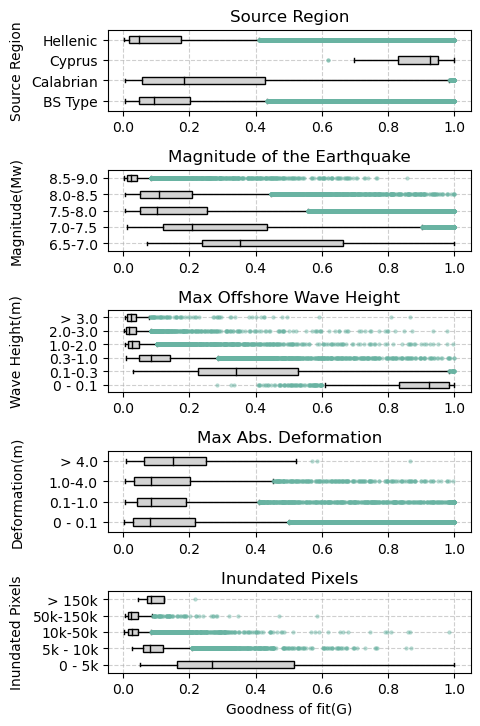

In [4]:
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import numpy as np

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
reg = 'SR'
if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

train_size = list_size[1]
eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')

eve_perf = eve_perf[eve_perf['split']=='test'] #filter test
# eve_perf = eve_perf[eve_perf['max_off']>0.1] #filter as training set

# eve_perf = eve_perf[eve_perf['l2n'] > 0.1]
# eve_perf = eve_perf[eve_perf['true'] > 10000]

mag_edges = np.arange(6.5, 9.5, 0.5)
dz_edges = [0,0.1,1,4,5]
area_edges = [0,5000,10000,50000,150000,200000]

eve_perf['mag_bin'] = pd.cut(eve_perf['Mag'], mag_edges)
eve_perf['dz_bin'] = pd.cut(eve_perf['max_absdz'], dz_edges)
eve_perf['area_bin'] = pd.cut(eve_perf['true'], area_edges)

# Create the figure and axes for each variable
fig, axs = plt.subplots(5,1,figsize=(5, 8))

# Titles for each subplot
titles = ['Source Region','Magnitude of the Earthquake','Max Offshore Wave Height','Max Abs. Deformation','Inundated Pixels']
yaxis_label= ['Source Region','Magnitude(Mw)','Wave Height(m)','Deformation(m)','Inundated Pixels']

eve_perf.boxplot(column='g', by='SR', vert=False, showfliers=True,
                 widths=0.35, patch_artist=True, ax=axs[0], 
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['BS Type','Calabrian','Cyprus','Hellenic']
axs[0].set_yticklabels(yticklabels)

eve_perf.boxplot(column='g', by='mag_bin', vert=False, showfliers=True,
                 widths=0.4, patch_artist=True, ax=axs[1],                
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['6.5-7.0','7.0-7.5','7.5-8.0','8.0-8.5','8.5-9.0']
axs[1].set_yticklabels(yticklabels)

# Plot horizontal boxplots
eve_perf.boxplot(column='g', by='max_off_bin', vert=False, showfliers=True,
                 widths=0.5, patch_artist=True, ax=axs[2],
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['0 - 0.1', '0.1-0.3', '0.3-1.0', '1.0-2.0', '2.0-3.0', '> 3.0']
axs[2].set_yticklabels(yticklabels)

eve_perf.boxplot(column='g', by='dz_bin', vert=False, showfliers=True,
                 widths=0.4, patch_artist=True, ax=axs[3],
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['0 - 0.1','0.1-1.0','1.0-4.0','> 4.0']
axs[3].set_yticklabels(yticklabels)

eve_perf.boxplot(column='g', by='area_bin', vert=False, showfliers=True,
                 widths=0.4, patch_artist=True, ax=axs[4],
                 flierprops=dict(marker='o', markerfacecolor='#69b3a2', markersize=3, markeredgecolor='none',alpha=0.5),
                 boxprops = dict(facecolor='lightgrey', color='black'),whiskerprops = dict(color='black', linewidth=1),
                 medianprops = dict(color='black', linewidth=1), capprops = dict(color='black', linewidth=1)
                 )
yticklabels = ['0 - 5k','5k - 10k','10k-50k','50k-150k','> 150k']
axs[4].set_yticklabels(yticklabels)

# Set the titles for each subplot
for i, ax in enumerate(axs):
    ax.set_title(titles[i])
    ax.set_ylabel(None)
    ax.text(-0.25,0.5,yaxis_label[i],rotation=90,va='center',ha='center',transform=ax.transAxes)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.set_xlabel('Goodness of fit(G)')
    

# Adjust the layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Set the main title for the figure
fig.suptitle(None)

# Display the plot
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/boxplot_{reg}_{train_size}_g.png',dpi=300, bbox_inches='tight')
plt.show()

Training Location Sensitivity

count 1658
count 48823
count 3023
count 115


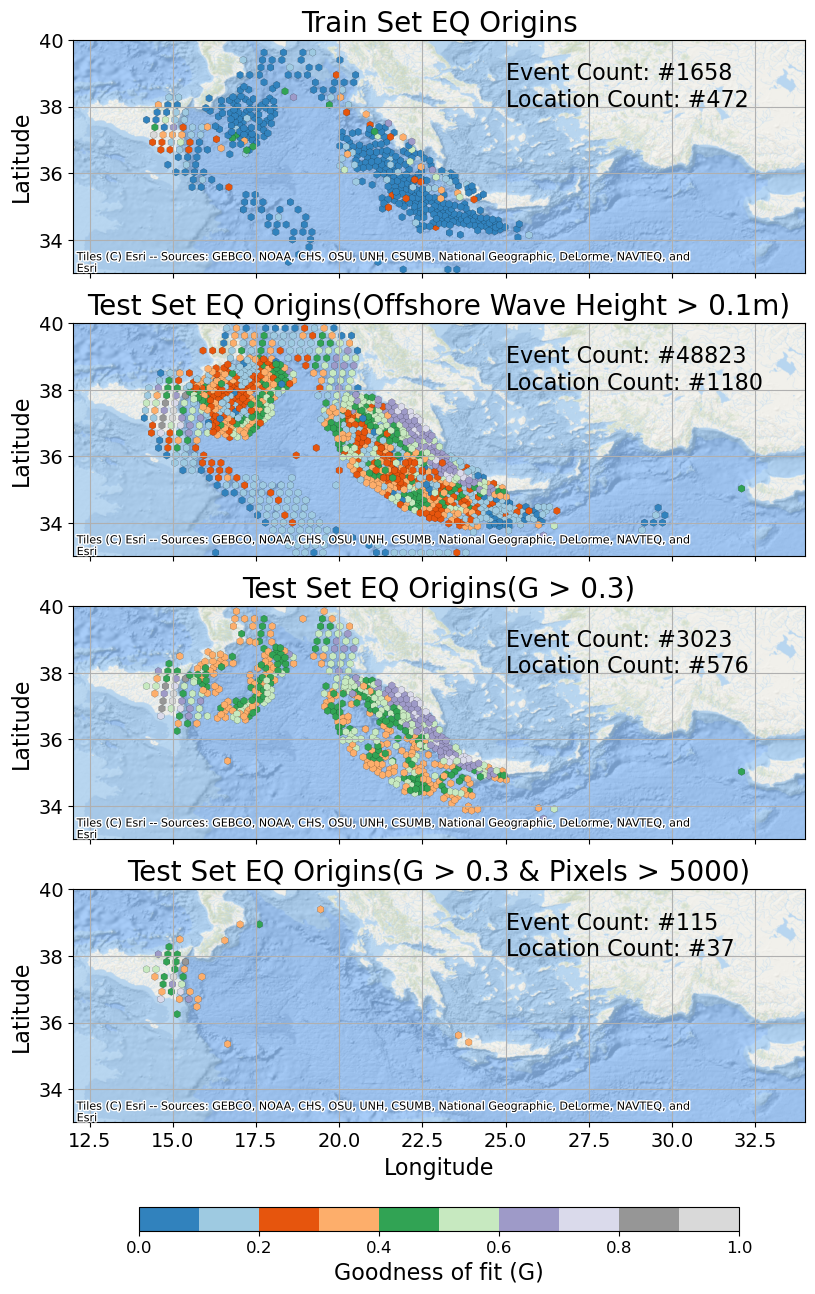

In [6]:
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import numpy as np

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
reg = 'CT'
if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

train_size = list_size[1]

eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')
eve_perf = eve_perf.sort_values(by='g', ascending=True)
eve_perf.reset_index(drop=True, inplace=True)

def filter_grids(samplelist):
    empty_table = pd.DataFrame()
    #filter rows per each grid_id, and keep row with lowest g value
    print('count',len(samplelist))
    for grid in samplelist['Location'].unique():
        samplegrid = samplelist[samplelist['Location']==grid]
        samplegrid = samplegrid.sort_values(by='g', ascending=False)
        #remove all rows except first one
        samplegrid = samplegrid.drop(samplegrid.index[1:])
        #append to empty table
        empty_table = pd.concat([empty_table,samplegrid],axis=0)
    return empty_table, len(samplelist)    

sample_train = eve_perf[eve_perf['split']=='train']
sample_train,train_count = filter_grids(sample_train)

sample_test = eve_perf[eve_perf['split']=='test']
sample_test = sample_test[sample_test['max_off']>0.1]
sample_test,test_count = filter_grids(sample_test)

sample_bad = eve_perf[eve_perf['split']=='test']
sample_bad = sample_bad[sample_bad['max_off']>0.1]
sample_bad = sample_bad[sample_bad['g']>0.3]
sample_bad,bad_count = filter_grids(sample_bad)
# bad_count = len(sample_bad)

sample_bad_bigger = eve_perf[eve_perf['split']=='test']
sample_bad_bigger = sample_bad_bigger[sample_bad_bigger['max_off']>0.1]
sample_bad_bigger = sample_bad_bigger[sample_bad_bigger['g']>0.3]
sample_bad_bigger= sample_bad_bigger[sample_bad_bigger['true']>5000]
sample_bad_bigger,realbad_count = filter_grids(sample_bad_bigger)

# Create figure and subplots
fig, ax = plt.subplots(4, 1, figsize=(20, 12),sharex=True,sharey=True)
axs = ax.ravel()

# Adjust aspect ratio, limits, and add basemap
for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(12, 34)
    ax.set_ylim(33, 40)
    cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.Esri.OceanBasemap)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    if ax == axs[3]:
        ax.set_xlabel('Longitude', fontsize=16)
    ax.set_ylabel('Latitude', fontsize=16)
    ax.grid()

# Add titles to each subplot
axs[0].set_title('Train Set EQ Origins', fontsize=20)
axs[1].set_title('Test Set EQ Origins(Offshore Wave Height > 0.1m)', fontsize=20)
axs[2].set_title('Test Set EQ Origins(G > 0.3)', fontsize=20)
axs[3].set_title('Test Set EQ Origins(G > 0.3 & Pixels > 5000)', fontsize=20)

# Function to determine marker size
def get_marker_size(sr_value):
    return 30 if sr_value == 'BS' else 30

# Define colormap
cmap = plt.get_cmap('tab20c', 10)

# Plot train events
sc_train = axs[0].scatter(sample_train['lon'], sample_train['lat'], c=sample_train['g'], s=[get_marker_size(sr) for sr in sample_train['SR']], 
                          cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[0].text(25, 38, f'Event Count: #{str(train_count)}\nLocation Count: #{len(sample_train)}', fontsize=16)

# Plot test events
sc_test = axs[1].scatter(sample_test['lon'], sample_test['lat'], c=sample_test['g'], s=[get_marker_size(sr) for sr in sample_test['SR']],
                          cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[1].text(25, 38, f'Event Count: #{str(test_count)}\nLocation Count: #{len(sample_test)}', fontsize=16)

# Plot bad events
sc_bad = axs[2].scatter(sample_bad['lon'], sample_bad['lat'], c=sample_bad['g'], s=[get_marker_size(sr) for sr in sample_bad['SR']],
                         cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[2].text(25, 38, f'Event Count: #{str(bad_count)}\nLocation Count: #{len(sample_bad)}', fontsize=16)

# Plot bad events with additional filters
sc_bad_filt = axs[3].scatter(sample_bad_bigger['lon'], sample_bad_bigger['lat'], c=sample_bad_bigger['g'],
                              s=[get_marker_size(sr) for sr in sample_bad_bigger['SR']], cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[3].text(25, 38, f'Event Count: #{str(realbad_count)}\nLocation Count: #{len(sample_bad_bigger)}', fontsize=16)

plt.tight_layout()

# Add a common colorbar for the whole fig using axes transform
cbar_ax = fig.add_axes([0.35, -0.03, 0.3, 0.02])
cbar = fig.colorbar(sc_train, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Goodness of fit (G)', fontsize=16)

# Save the figure if needed
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/map_{reg}_train_test_bad_all{train_size}.png', dpi=600, bbox_inches='tight', pad_inches=0.1)


count 1767
count 49756
count 7234


count 359


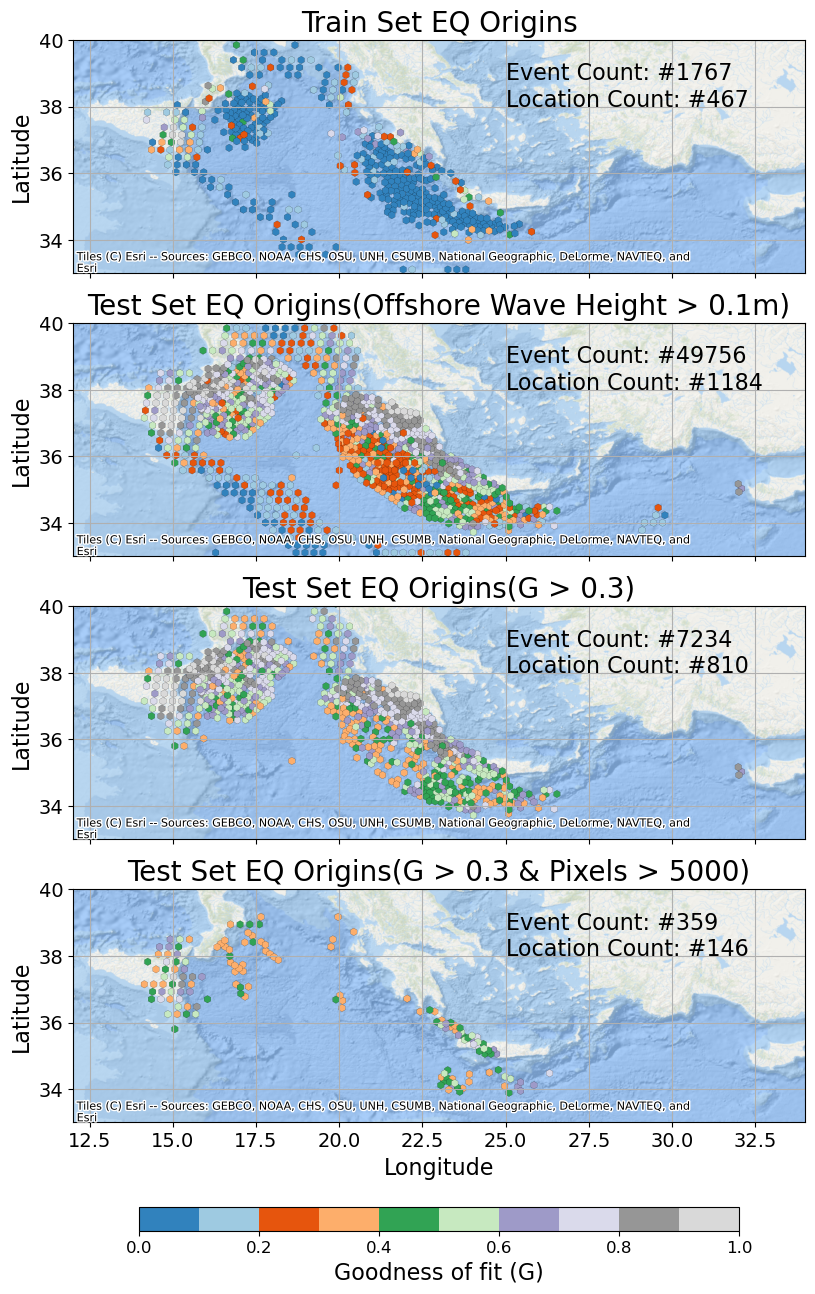

In [7]:
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import numpy as np

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
reg = 'SR'
if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

train_size = list_size[1]

eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')
eve_perf = eve_perf.sort_values(by='g', ascending=True)
eve_perf.reset_index(drop=True, inplace=True)

def filter_grids(samplelist):
    empty_table = pd.DataFrame()
    #filter rows per each grid_id, and keep row with lowest g value
    print('count',len(samplelist))
    for grid in samplelist['Location'].unique():
        samplegrid = samplelist[samplelist['Location']==grid]
        samplegrid = samplegrid.sort_values(by='g', ascending=False)
        #remove all rows except first one
        samplegrid = samplegrid.drop(samplegrid.index[1:])
        #append to empty table
        empty_table = pd.concat([empty_table,samplegrid],axis=0)
    return empty_table, len(samplelist)    

sample_train = eve_perf[eve_perf['split']=='train']
sample_train,train_count = filter_grids(sample_train)

sample_test = eve_perf[eve_perf['split']=='test']
sample_test = sample_test[sample_test['max_off']>0.1]
sample_test,test_count = filter_grids(sample_test)

sample_bad = eve_perf[eve_perf['split']=='test']
sample_bad = sample_bad[sample_bad['max_off']>0.1]
sample_bad = sample_bad[sample_bad['g']>0.3]
sample_bad,bad_count = filter_grids(sample_bad)
# bad_count = len(sample_bad)

sample_bad_bigger = eve_perf[eve_perf['split']=='test']
sample_bad_bigger = sample_bad_bigger[sample_bad_bigger['max_off']>0.1]
sample_bad_bigger = sample_bad_bigger[sample_bad_bigger['g']>0.3]
sample_bad_bigger= sample_bad_bigger[sample_bad_bigger['true']>5000]
sample_bad_bigger,realbad_count = filter_grids(sample_bad_bigger)

# Create figure and subplots
fig, ax = plt.subplots(4, 1, figsize=(20, 12),sharex=True,sharey=True)
axs = ax.ravel()

# Adjust aspect ratio, limits, and add basemap
for ax in axs:
    ax.set_aspect('equal')
    ax.set_xlim(12, 34)
    ax.set_ylim(33, 40)
    cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.Esri.OceanBasemap)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    if ax == axs[3]:
        ax.set_xlabel('Longitude', fontsize=16)
    ax.set_ylabel('Latitude', fontsize=16)
    ax.grid()

# Add titles to each subplot
axs[0].set_title('Train Set EQ Origins', fontsize=20)
axs[1].set_title('Test Set EQ Origins(Offshore Wave Height > 0.1m)', fontsize=20)
axs[2].set_title('Test Set EQ Origins(G > 0.3)', fontsize=20)
axs[3].set_title('Test Set EQ Origins(G > 0.3 & Pixels > 5000)', fontsize=20)

# Function to determine marker size
def get_marker_size(sr_value):
    return 30 if sr_value == 'BS' else 30

# Define colormap
cmap = plt.get_cmap('tab20c', 10)

# Plot train events
sc_train = axs[0].scatter(sample_train['lon'], sample_train['lat'], c=sample_train['g'], s=[get_marker_size(sr) for sr in sample_train['SR']], 
                          cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[0].text(25, 38, f'Event Count: #{str(train_count)}\nLocation Count: #{len(sample_train)}', fontsize=16)

# Plot test events
sc_test = axs[1].scatter(sample_test['lon'], sample_test['lat'], c=sample_test['g'], s=[get_marker_size(sr) for sr in sample_test['SR']],
                          cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[1].text(25, 38, f'Event Count: #{str(test_count)}\nLocation Count: #{len(sample_test)}', fontsize=16)

# Plot bad events
sc_bad = axs[2].scatter(sample_bad['lon'], sample_bad['lat'], c=sample_bad['g'], s=[get_marker_size(sr) for sr in sample_bad['SR']],
                         cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[2].text(25, 38, f'Event Count: #{str(bad_count)}\nLocation Count: #{len(sample_bad)}', fontsize=16)

# Plot bad events with additional filters
sc_bad_filt = axs[3].scatter(sample_bad_bigger['lon'], sample_bad_bigger['lat'], c=sample_bad_bigger['g'],
                              s=[get_marker_size(sr) for sr in sample_bad_bigger['SR']], cmap=cmap, vmin=0, vmax=1.0, marker='h', edgecolors='k', linewidth=0.1)
axs[3].text(25, 38, f'Event Count: #{str(realbad_count)}\nLocation Count: #{len(sample_bad_bigger)}', fontsize=16)

plt.tight_layout()

# Add a common colorbar for the whole fig using axes transform
cbar_ax = fig.add_axes([0.35, -0.03, 0.3, 0.02])
cbar = fig.colorbar(sc_train, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Goodness of fit (G)', fontsize=16)

# Save the figure if needed
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/map_{reg}_train_test_bad_all{train_size}.png', dpi=600, bbox_inches='tight', pad_inches=0.1)


Training Size Sensitivity

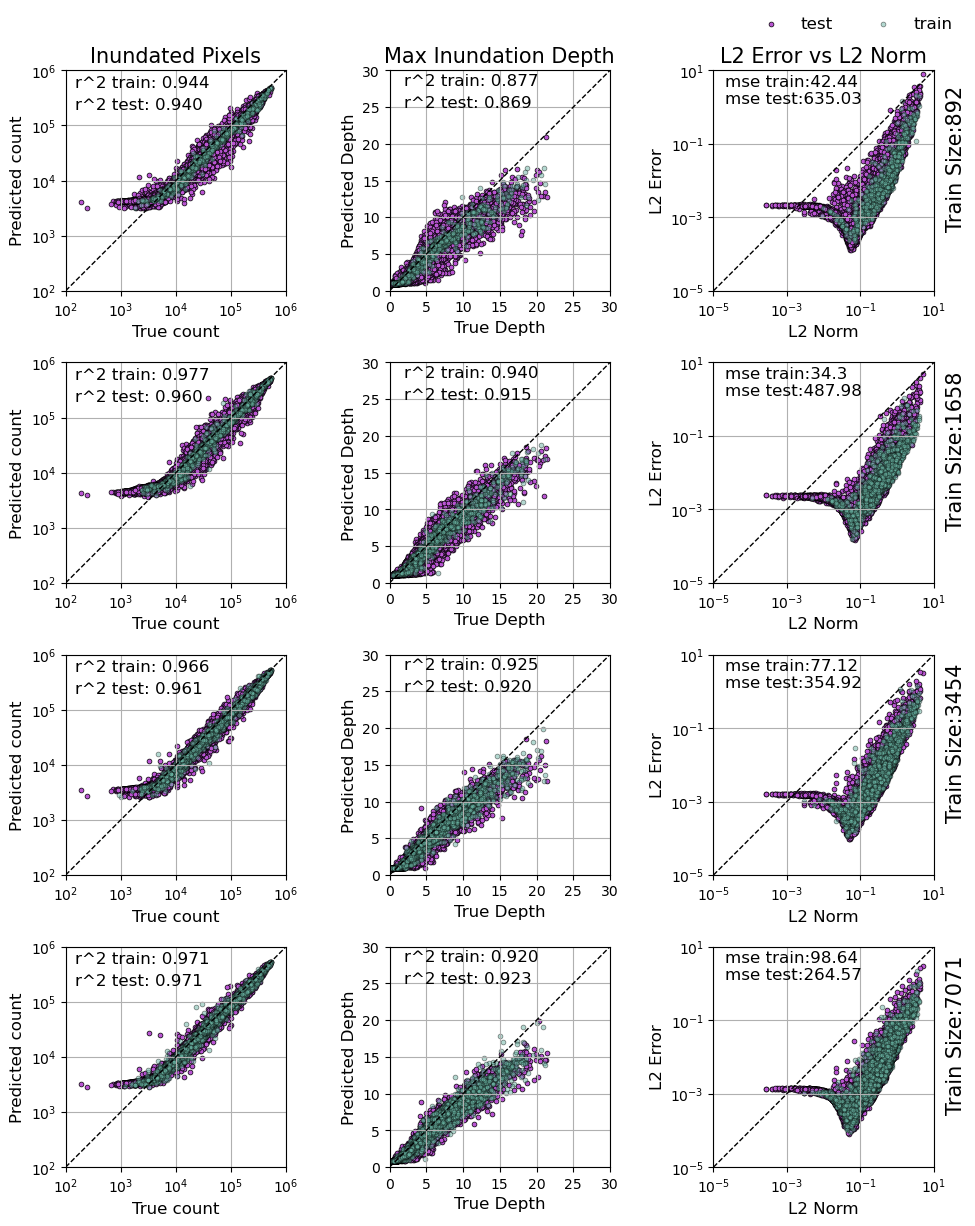

In [2]:
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import r2_score
import xarray as xr

#select particular representative gauge
reg = 'CT'

if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"
mask_size = list_size[0]
train_size = list_size[1]

# Create a single figure with three axes
fig, ax = plt.subplots(4, 3, figsize=(10, 12))
for t,train_size in enumerate(list_size):
    eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')

    # Plot scatter of flood count
    x = eve_perf[eve_perf['split'] == 'test']['true']
    y = eve_perf[eve_perf['split'] == 'test']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    #add r2 score at bottom right of axis
    ax[t,0].text(150,2e5,f"r^2 test: {r2area:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['true']
    y = eve_perf[eve_perf['split'] == 'train']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,0].text(150,5e5,f"r^2 train: {r2area:.3f} ", fontsize=12)
    
    if t == 0:
        ax[t,0].set_title("Inundated Pixels",fontsize=15)
    
    ax[t,0].plot([0, 1], [0, 1], transform=ax[t,0].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    ax[t,0].set_aspect('equal', adjustable='box')
    ax[t,0].set_xscale('log')
    ax[t,0].set_yscale('log')
    ax[t,0].set_xlim(100, 1000000)
    ax[t,0].set_ylim(100, 1000000)
    ax[t,0].grid()
    ax[t,0].minorticks_off()
    ax[t,0].set_xlabel('True count',fontsize=12)
    ax[t,0].set_ylabel('Predicted count',fontsize=12)

    # Plot scatter of max depth for each event
    # Calculate the point density
   
    # Plot scatter of max depth for each event
    x = eve_perf[eve_perf['split'] == 'test']['truemax']
    y = eve_perf[eve_perf['split'] == 'test']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 25, f"r^2 test: {r2maxdepth:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['truemax']
    y = eve_perf[eve_perf['split'] == 'train']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 28, f"r^2 train: {r2maxdepth:.3f} ", fontsize=12)

    ax[t,1].plot([0, 1], [0, 1], transform=ax[t,1].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t ==0:
        ax[t,1].set_title("Max Inundation Depth",fontsize=15)
    ax[t,1].set_xlim(0, 30)
    ax[t,1].set_ylim(0, 30)
    ax[t,1].grid()
    ax[t,1].set_xlabel('True Depth',fontsize=12)
    ax[t,1].set_ylabel('Predicted Depth',fontsize=12)
    ax[t,1].set_aspect('equal', adjustable='box')
    ax[t,1].xaxis.set_ticks(np.arange(0, 35, 5))

    # Plot scatter of mse vs l2norm
    x = eve_perf[eve_perf['split'] == 'test']['l2n']
    y = eve_perf[eve_perf['split'] == 'test']['mse']
    para_test = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)

    x = eve_perf[eve_perf['split'] == 'train']['l2n']
    y = eve_perf[eve_perf['split'] == 'train']['mse']
    para_train = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,2].text(0.05, 0.85, f"mse train:{para_train}\nmse test:{para_test}", fontsize=12,transform=ax[t,2].transAxes)
    
    ax[t,2].plot([0, 1], [0, 1], transform=ax[t,2].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t == 0:
        ax[t,2].set_title(f"L2 Error vs L2 Norm",fontsize=15)
    ax[t,2].set_aspect('equal', adjustable='box')
    ax[t,2].set_xscale('log')
    ax[t,2].set_yscale('log')
    ax[t,2].set_xlim(.00001, 10)
    ax[t,2].set_ylim(.00001, 10)
    ax[t,2].grid()
    ax[t,2].minorticks_off()
    ax[t,2].set_xlabel('L2 Norm',fontsize=12)
    ax[t,2].set_ylabel('L2 Error',fontsize=12)
    ax[t,2].text(1.1,0.6,f'Train Size:{train_size}',horizontalalignment='center',verticalalignment='center',transform=ax[t,2].transAxes,fontsize=15,rotation=90)


#save the plot
handles, labels = ax[t,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside upper right', fontsize=12, ncol=2,bbox_to_anchor=(.98, 1.025),frameon= False)
plt.tight_layout()
plt.savefig(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/scripts/PaperIIPlots/plots/combined_trainingsize{reg}_direct.png',dpi=300, bbox_inches='tight')


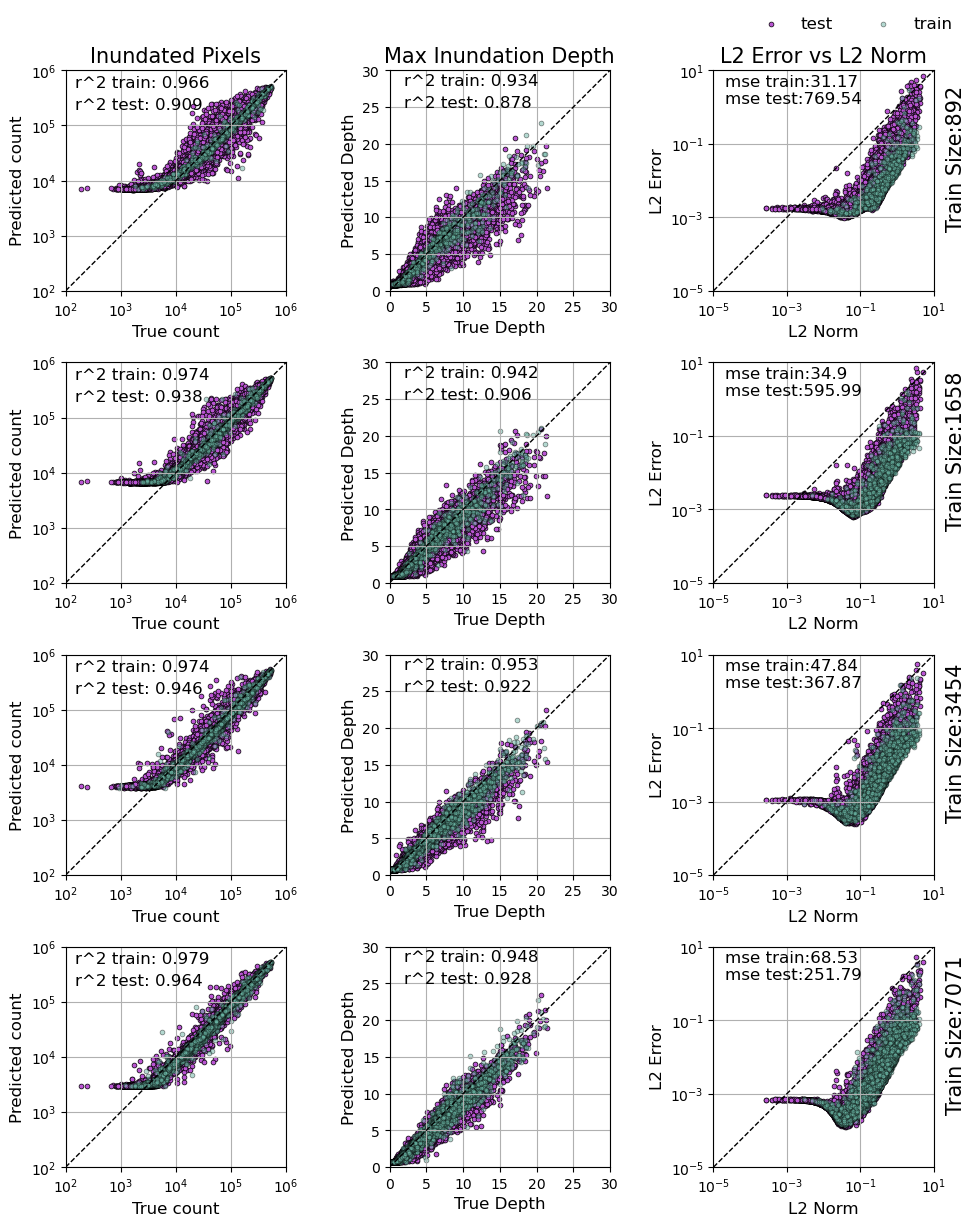

In [47]:
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import r2_score
import xarray as xr

#select particular representative gauge
reg = 'CT'

if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"
mask_size = list_size[0]
train_size = list_size[1]

# Create a single figure with three axes
fig, ax = plt.subplots(4, 3, figsize=(10, 12))
for t,train_size in enumerate(list_size):
    eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')

    # Plot scatter of flood count
    x = eve_perf[eve_perf['split'] == 'test']['true']
    y = eve_perf[eve_perf['split'] == 'test']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    #add r2 score at bottom right of axis
    ax[t,0].text(150,2e5,f"r^2 test: {r2area:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['true']
    y = eve_perf[eve_perf['split'] == 'train']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,0].text(150,5e5,f"r^2 train: {r2area:.3f} ", fontsize=12)
    
    if t == 0:
        ax[t,0].set_title("Inundated Pixels",fontsize=15)
    
    ax[t,0].plot([0, 1], [0, 1], transform=ax[t,0].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    ax[t,0].set_aspect('equal', adjustable='box')
    ax[t,0].set_xscale('log')
    ax[t,0].set_yscale('log')
    ax[t,0].set_xlim(100, 1000000)
    ax[t,0].set_ylim(100, 1000000)
    ax[t,0].grid()
    ax[t,0].minorticks_off()
    ax[t,0].set_xlabel('True count',fontsize=12)
    ax[t,0].set_ylabel('Predicted count',fontsize=12)

    # Plot scatter of max depth for each event
    # Calculate the point density
   
    # Plot scatter of max depth for each event
    x = eve_perf[eve_perf['split'] == 'test']['truemax']
    y = eve_perf[eve_perf['split'] == 'test']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 25, f"r^2 test: {r2maxdepth:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['truemax']
    y = eve_perf[eve_perf['split'] == 'train']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 28, f"r^2 train: {r2maxdepth:.3f} ", fontsize=12)

    ax[t,1].plot([0, 1], [0, 1], transform=ax[t,1].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t ==0:
        ax[t,1].set_title("Max Inundation Depth",fontsize=15)
    ax[t,1].set_xlim(0, 30)
    ax[t,1].set_ylim(0, 30)
    ax[t,1].grid()
    ax[t,1].set_xlabel('True Depth',fontsize=12)
    ax[t,1].set_ylabel('Predicted Depth',fontsize=12)
    ax[t,1].set_aspect('equal', adjustable='box')
    ax[t,1].xaxis.set_ticks(np.arange(0, 35, 5))

    # Plot scatter of mse vs l2norm
    x = eve_perf[eve_perf['split'] == 'test']['l2n']
    y = eve_perf[eve_perf['split'] == 'test']['mse']
    para_test = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)

    x = eve_perf[eve_perf['split'] == 'train']['l2n']
    y = eve_perf[eve_perf['split'] == 'train']['mse']
    para_train = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,2].text(0.05, 0.85, f"mse train:{para_train}\nmse test:{para_test}", fontsize=12,transform=ax[t,2].transAxes)
    
    ax[t,2].plot([0, 1], [0, 1], transform=ax[t,2].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t == 0:
        ax[t,2].set_title(f"L2 Error vs L2 Norm",fontsize=15)
    ax[t,2].set_aspect('equal', adjustable='box')
    ax[t,2].set_xscale('log')
    ax[t,2].set_yscale('log')
    ax[t,2].set_xlim(.00001, 10)
    ax[t,2].set_ylim(.00001, 10)
    ax[t,2].grid()
    ax[t,2].minorticks_off()
    ax[t,2].set_xlabel('L2 Norm',fontsize=12)
    ax[t,2].set_ylabel('L2 Error',fontsize=12)
    ax[t,2].text(1.1,0.6,f'Train Size:{train_size}',horizontalalignment='center',verticalalignment='center',transform=ax[t,2].transAxes,fontsize=15,rotation=90)


#save the plot
handles, labels = ax[t,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside upper right', fontsize=12, ncol=2,bbox_to_anchor=(.98, 1.025),frameon= False)
plt.tight_layout()
plt.savefig(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/scripts/PaperIIPlots/plots/combined_trainingsize{reg}.png',dpi=300, bbox_inches='tight')


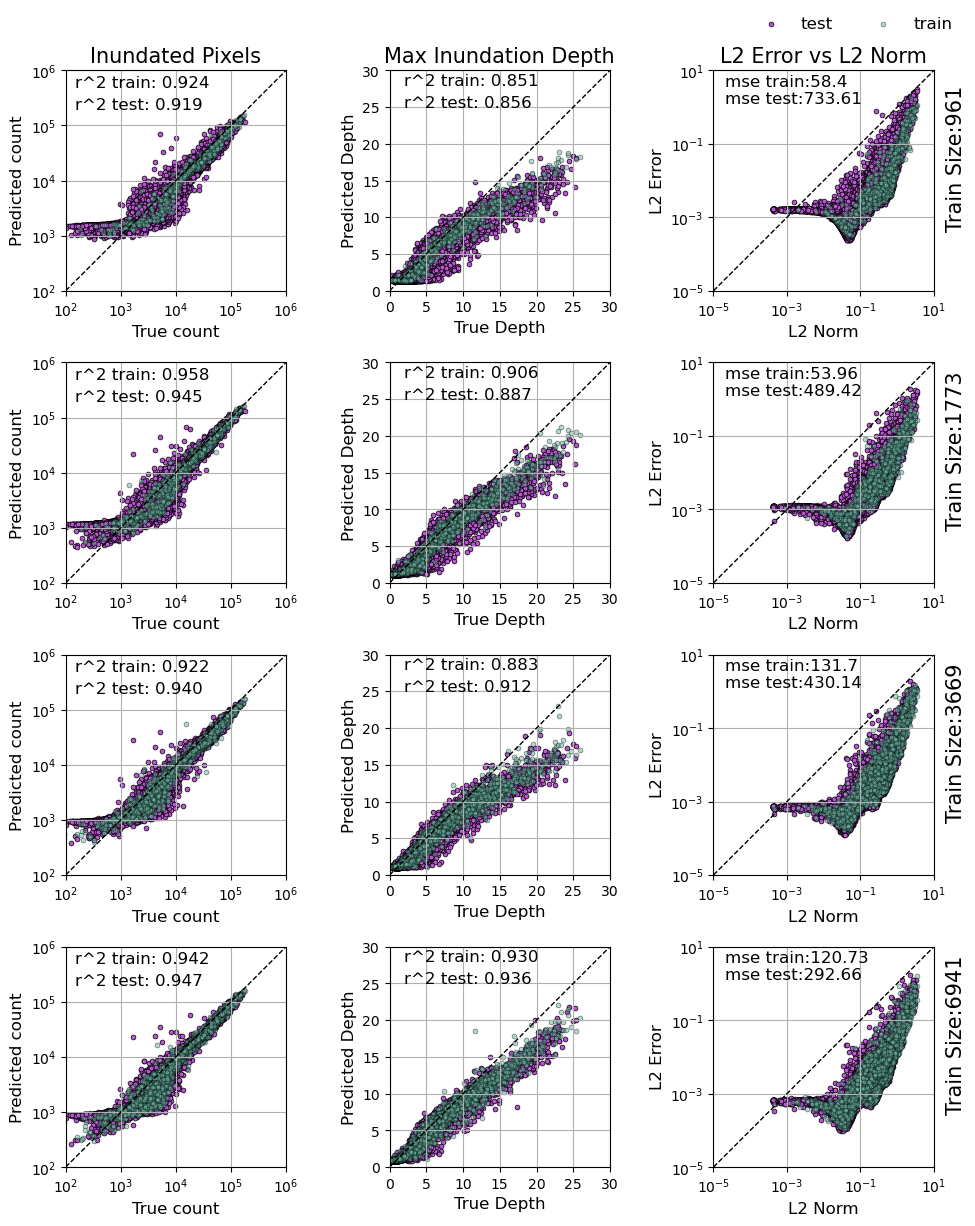

In [46]:
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import r2_score
import xarray as xr

#select particular representative gauge
reg = 'SR'

if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"
mask_size = list_size[0]
train_size = list_size[1]

# Create a single figure with three axes
fig, ax = plt.subplots(4, 3, figsize=(10, 12))
for t,train_size in enumerate(list_size):
    eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')

    # Plot scatter of flood count
    x = eve_perf[eve_perf['split'] == 'test']['true']
    y = eve_perf[eve_perf['split'] == 'test']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    #add r2 score at bottom right of axis
    ax[t,0].text(150,2e5,f"r^2 test: {r2area:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['true']
    y = eve_perf[eve_perf['split'] == 'train']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,0].text(150,5e5,f"r^2 train: {r2area:.3f} ", fontsize=12)
    
    if t == 0:
        ax[t,0].set_title("Inundated Pixels",fontsize=15)
    
    ax[t,0].plot([0, 1], [0, 1], transform=ax[t,0].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    ax[t,0].set_aspect('equal', adjustable='box')
    ax[t,0].set_xscale('log')
    ax[t,0].set_yscale('log')
    ax[t,0].set_xlim(100, 1000000)
    ax[t,0].set_ylim(100, 1000000)
    ax[t,0].grid()
    ax[t,0].minorticks_off()
    ax[t,0].set_xlabel('True count',fontsize=12)
    ax[t,0].set_ylabel('Predicted count',fontsize=12)

    # Plot scatter of max depth for each event
    # Calculate the point density
   
    # Plot scatter of max depth for each event
    x = eve_perf[eve_perf['split'] == 'test']['truemax']
    y = eve_perf[eve_perf['split'] == 'test']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 25, f"r^2 test: {r2maxdepth:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['truemax']
    y = eve_perf[eve_perf['split'] == 'train']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 28, f"r^2 train: {r2maxdepth:.3f} ", fontsize=12)

    ax[t,1].plot([0, 1], [0, 1], transform=ax[t,1].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t ==0:
        ax[t,1].set_title("Max Inundation Depth",fontsize=15)
    ax[t,1].set_xlim(0, 30)
    ax[t,1].set_ylim(0, 30)
    ax[t,1].grid()
    ax[t,1].set_xlabel('True Depth',fontsize=12)
    ax[t,1].set_ylabel('Predicted Depth',fontsize=12)
    ax[t,1].set_aspect('equal', adjustable='box')
    ax[t,1].xaxis.set_ticks(np.arange(0, 35, 5))

    # Plot scatter of mse vs l2norm
    x = eve_perf[eve_perf['split'] == 'test']['l2n']
    y = eve_perf[eve_perf['split'] == 'test']['mse']
    para_test = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)

    x = eve_perf[eve_perf['split'] == 'train']['l2n']
    y = eve_perf[eve_perf['split'] == 'train']['mse']
    para_train = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,2].text(0.05, 0.85, f"mse train:{para_train}\nmse test:{para_test}", fontsize=12,transform=ax[t,2].transAxes)
    
    ax[t,2].plot([0, 1], [0, 1], transform=ax[t,2].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t == 0:
        ax[t,2].set_title(f"L2 Error vs L2 Norm",fontsize=15)
    ax[t,2].set_aspect('equal', adjustable='box')
    ax[t,2].set_xscale('log')
    ax[t,2].set_yscale('log')
    ax[t,2].set_xlim(.00001, 10)
    ax[t,2].set_ylim(.00001, 10)
    ax[t,2].grid()
    ax[t,2].minorticks_off()
    ax[t,2].set_xlabel('L2 Norm',fontsize=12)
    ax[t,2].set_ylabel('L2 Error',fontsize=12)
    ax[t,2].text(1.1,0.6,f'Train Size:{train_size}',horizontalalignment='center',verticalalignment='center',transform=ax[t,2].transAxes,fontsize=15,rotation=90)


#save the plot
handles, labels = ax[t,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside upper right', fontsize=12, ncol=2,bbox_to_anchor=(.98, 1.025),frameon= False)
plt.tight_layout()
plt.savefig(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/scripts/PaperIIPlots/plots/combined_trainingsize{reg}_direct.png',dpi=300, bbox_inches='tight')

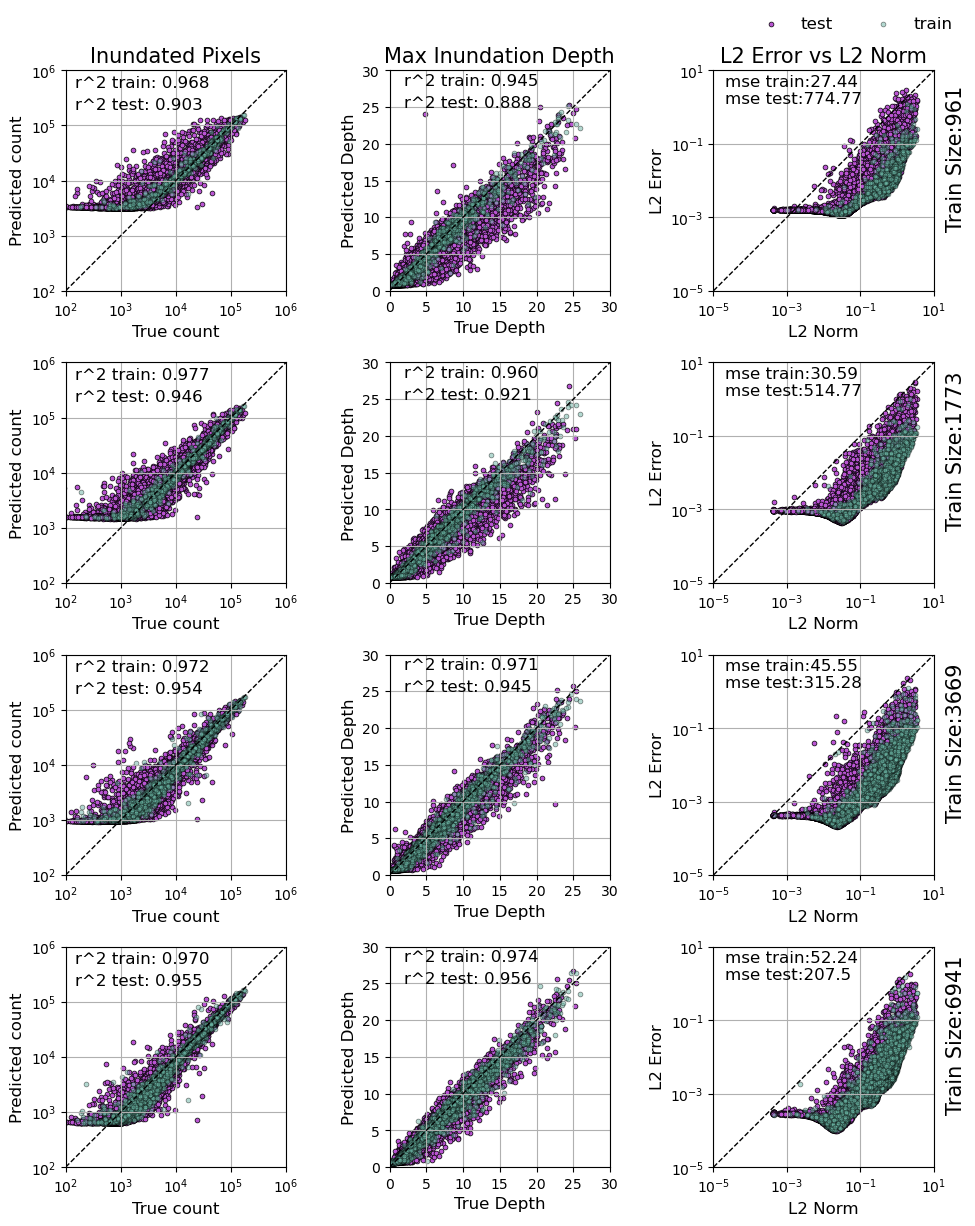

In [45]:
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import r2_score
import xarray as xr

#select particular representative gauge
reg = 'SR'

if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']

MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"
mask_size = list_size[0]
train_size = list_size[1]

# Create a single figure with three axes
fig, ax = plt.subplots(4, 3, figsize=(10, 12))
for t,train_size in enumerate(list_size):
    eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')

    # Plot scatter of flood count
    x = eve_perf[eve_perf['split'] == 'test']['true']
    y = eve_perf[eve_perf['split'] == 'test']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    #add r2 score at bottom right of axis
    ax[t,0].text(150,2e5,f"r^2 test: {r2area:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['true']
    y = eve_perf[eve_perf['split'] == 'train']['pred']
    r2area = r2_score(x, y)
    scatter = ax[t,0].scatter(x, y, s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,0].text(150,5e5,f"r^2 train: {r2area:.3f} ", fontsize=12)
    
    if t == 0:
        ax[t,0].set_title("Inundated Pixels",fontsize=15)
    
    ax[t,0].plot([0, 1], [0, 1], transform=ax[t,0].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    ax[t,0].set_aspect('equal', adjustable='box')
    ax[t,0].set_xscale('log')
    ax[t,0].set_yscale('log')
    ax[t,0].set_xlim(100, 1000000)
    ax[t,0].set_ylim(100, 1000000)
    ax[t,0].grid()
    ax[t,0].minorticks_off()
    ax[t,0].set_xlabel('True count',fontsize=12)
    ax[t,0].set_ylabel('Predicted count',fontsize=12)

    # Plot scatter of max depth for each event
    # Calculate the point density
   
    # Plot scatter of max depth for each event
    x = eve_perf[eve_perf['split'] == 'test']['truemax']
    y = eve_perf[eve_perf['split'] == 'test']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 25, f"r^2 test: {r2maxdepth:.3f} ", fontsize=12)

    x = eve_perf[eve_perf['split'] == 'train']['truemax']
    y = eve_perf[eve_perf['split'] == 'train']['predmax']
    scatter = ax[t,1].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    
    r2maxdepth = r2_score(x, y)
    ax[t,1].text(2, 28, f"r^2 train: {r2maxdepth:.3f} ", fontsize=12)

    ax[t,1].plot([0, 1], [0, 1], transform=ax[t,1].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t ==0:
        ax[t,1].set_title("Max Inundation Depth",fontsize=15)
    ax[t,1].set_xlim(0, 30)
    ax[t,1].set_ylim(0, 30)
    ax[t,1].grid()
    ax[t,1].set_xlabel('True Depth',fontsize=12)
    ax[t,1].set_ylabel('Predicted Depth',fontsize=12)
    ax[t,1].set_aspect('equal', adjustable='box')
    ax[t,1].xaxis.set_ticks(np.arange(0, 35, 5))

    # Plot scatter of mse vs l2norm
    x = eve_perf[eve_perf['split'] == 'test']['l2n']
    y = eve_perf[eve_perf['split'] == 'test']['mse']
    para_test = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y, s=12,label='test', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 1)

    x = eve_perf[eve_perf['split'] == 'train']['l2n']
    y = eve_perf[eve_perf['split'] == 'train']['mse']
    para_train = np.sum(y).round(2)
    scatter = ax[t,2].scatter(x, y,s=12,label='train', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=0.5)
    ax[t,2].text(0.05, 0.85, f"mse train:{para_train}\nmse test:{para_test}", fontsize=12,transform=ax[t,2].transAxes)
    
    ax[t,2].plot([0, 1], [0, 1], transform=ax[t,2].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    if t == 0:
        ax[t,2].set_title(f"L2 Error vs L2 Norm",fontsize=15)
    ax[t,2].set_aspect('equal', adjustable='box')
    ax[t,2].set_xscale('log')
    ax[t,2].set_yscale('log')
    ax[t,2].set_xlim(.00001, 10)
    ax[t,2].set_ylim(.00001, 10)
    ax[t,2].grid()
    ax[t,2].minorticks_off()
    ax[t,2].set_xlabel('L2 Norm',fontsize=12)
    ax[t,2].set_ylabel('L2 Error',fontsize=12)
    ax[t,2].text(1.1,0.6,f'Train Size:{train_size}',horizontalalignment='center',verticalalignment='center',transform=ax[t,2].transAxes,fontsize=15,rotation=90)


#save the plot
handles, labels = ax[t,2].get_legend_handles_labels()
fig.legend(handles, labels, loc='outside upper right', fontsize=12, ncol=2,bbox_to_anchor=(.98, 1.025),frameon= False)
plt.tight_layout()
plt.savefig(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/scripts/PaperIIPlots/plots/combined_trainingsize{reg}.png',dpi=300, bbox_inches='tight')

Compare the training loss for direct training and coupling pretrained components

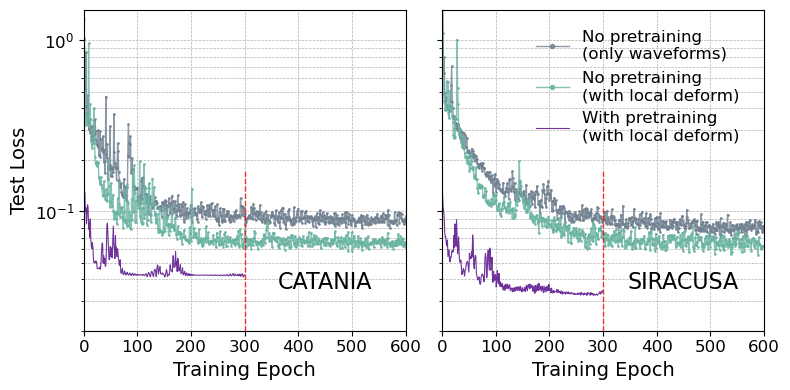

In [43]:
import matplotlib.pyplot as plt
import numpy as np

for reg in ['CT','SR']:
    if reg == 'CT':
        columnname = str(38)
        list_size = ['892','1658','3454','7071']  
        train_size = list_size[1]
        nodeform_loss_ct = np.load(f"{MLDir}/model/{reg}/out/test_loss_nodeform_{train_size}.npy")
        direct_loss_ct = np.load(f"{MLDir}/model/{reg}/out/test_loss_withdeform_{train_size}.npy")
        couple_loss_ct = np.load(f"{MLDir}/model/{reg}/out/test_loss_couple_{train_size}.npy")
    elif reg == 'SR':
        columnname = str(54)
        list_size = ['961','1773','3669','6941']
        train_size = list_size[1]
        nodeform_loss_sr = np.load(f"{MLDir}/model/{reg}/out/test_loss_nodeform_{train_size}.npy")
        direct_loss_sr = np.load(f"{MLDir}/model/{reg}/out/test_loss_withdeform_{train_size}.npy")
        couple_loss_sr = np.load(f"{MLDir}/model/{reg}/out/test_loss_couple_{train_size}.npy")

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)  # Setting sharey=True for common y-axis
# fig.suptitle('Benefit of pretraining and local deformation as input', fontsize=16)  # Adding title to the figure

# Plotting the graph for CT with enhanced styling
axs[0].plot(nodeform_loss_ct, label='No pretraining - only waveforms', color='slategrey', linestyle='-', linewidth=1, alpha=0.8, marker='o',markersize=1)
axs[0].plot(direct_loss_ct, label='No pretraining - with local deform', color='#69b3a2', linestyle='-', linewidth=1, alpha=0.8, marker='o',markersize=1)
axs[0].plot(couple_loss_ct, label='With pretraining - with local deform',color='indigo', linestyle='-', linewidth=0.8, alpha=0.8,)# marker='o',markersize=1)
axs[0].text(0.75, 0.15, 'CATANIA', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes, fontsize=16)  # Adding text to the graph
axs[0].axvline(x=300,ymax =0.5, color='red', linestyle='--', linewidth=1, alpha=0.8)  # Adding vertical line for early stopping epoch
axs[0].set_xlabel('Training Epoch', fontsize=14)
axs[0].set_ylabel('Test Loss', fontsize=14)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_xlim(0, 600)
axs[0].set_ylim(0.04, 1.5)
axs[0].set_yscale('log')

# Plotting the graph for SR with enhanced styling
axs[1].plot(nodeform_loss_sr, label='No pretraining\n(only waveforms)', color='slategrey', linestyle='-', linewidth=1, alpha=0.8, marker='o',markersize=1)
axs[1].plot(direct_loss_sr, label='No pretraining\n(with local deform)',  color='#69b3a2', linestyle='-', linewidth=1, alpha=0.8, marker='o',markersize=1)
axs[1].plot(couple_loss_sr, label='With pretraining\n(with local deform)',color='indigo', linestyle='-', linewidth=0.8, alpha=0.8)#, marker='o',markersize=1)
axs[1].text(0.75, 0.15, 'SIRACUSA', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes, fontsize=16)  # Adding text to the graph
axs[1].axvline(x=300,ymax =0.5, color='red', linestyle='--', linewidth=1, alpha=0.8)  # Adding vertical line for early stopping epoch
axs[1].set_xlabel('Training Epoch', fontsize=14)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_xlim(0, 600)
axs[1].set_ylim(0.02, 1.5)
axs[1].set_yscale('log')

# Adjusting layout to prevent clipping of labels
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, fontsize =12, loc='outside upper right',
           ncol=1, shadow=True, frameon=False,bbox_to_anchor=(.95, .95),
           markerscale=3)  # Adding legend with shadow
plt.tight_layout()
plt.savefig('./plots/pretrain_SR_CT_epoch.png', dpi=300, bbox_inches='tight')

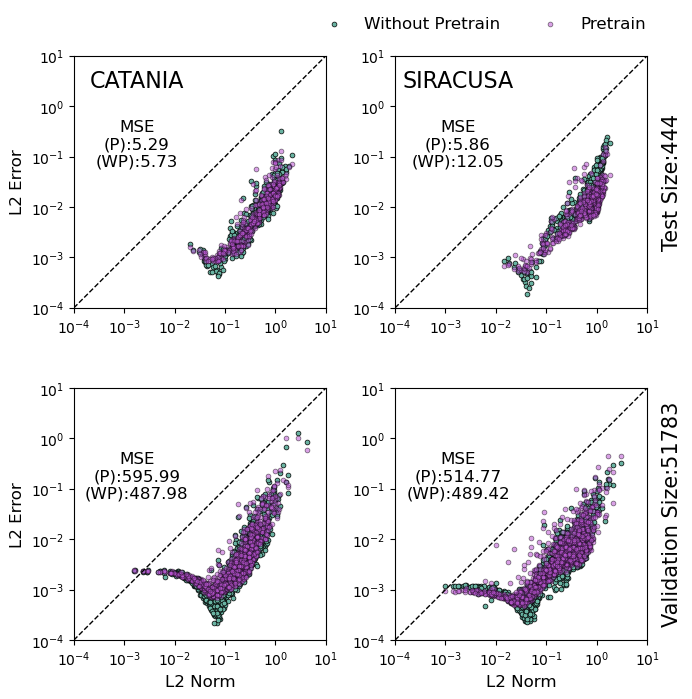

In [23]:
from sklearn.metrics import r2_score
from scipy.stats import gaussian_kde 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import r2_score
import xarray as xr

MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"

# Create a single figure with three axes
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
for r,reg in enumerate(['CT','SR']):
    if reg == 'CT':
        columnname = str(38)
        list_size = ['892','1658','3454','7071']  
    elif reg == 'SR':
        columnname = str(54)
        list_size = ['961','1773','3669','6941']
    mask_size = list_size[0]
    train_size = list_size[1]

    eve_perf = pd.read_csv(f'{MLDir}/model/{reg}/out/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')
    eve_perf_direct = pd.read_csv(f'{MLDir}/model/{reg}/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv')

    train_set = np.loadtxt(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/events/sample_events{train_size}_{reg}_{columnname}.txt',dtype='str')
    test_set = train_set[int(0.75*len(train_set)):]
    test_len = len(eve_perf[eve_perf['split'] == 'test'])
    val_len = len(eve_perf[eve_perf['id'].isin(test_set)])

    # Plot scatter of mse vs l2norm for 25% of train set
    x = eve_perf_direct[eve_perf_direct['id'].isin(test_set)]['l2n']
    y = eve_perf_direct[eve_perf_direct['id'].isin(test_set)]['mse']
    g = eve_perf_direct[eve_perf_direct['id'].isin(test_set)]['g']
    para_direct = np.mean(g).round(2)
    para_direct = np.sum(y).round(2)
    scatter = ax[0,r].scatter(x[::1], y[::1],s=12,label='Without Pretrain', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=1)
    ax[0,r].plot([0, 1], [0, 1], transform=ax[0,r].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    x = eve_perf[eve_perf['id'].isin(test_set)]['l2n']
    y = eve_perf[eve_perf['id'].isin(test_set)]['mse']
    g = eve_perf[eve_perf['id'].isin(test_set)]['g']
    para_pre = np.mean(g).round(2)
    para_pre = np.sum(y).round(2)
    scatter = ax[0,r].scatter(x, y, s=12,label='Pretrain', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 0.55)

    #add ysum as text
    ax[0,r].text(0.25, 0.65, f'MSE\n(P):{para_pre}\n(WP):{para_direct}', horizontalalignment='center', verticalalignment='center', transform=ax[0,r].transAxes, fontsize=12)  # Adding text to the graph
    
    # Plot scatter of mse vs l2norm for both models test set
   
    x = eve_perf_direct[eve_perf_direct['split'] == 'test']['l2n']
    y = eve_perf_direct[eve_perf_direct['split'] == 'test']['mse']
    g = eve_perf_direct[eve_perf_direct['split'] == 'test']['g']
    para_direct = np.mean(g).round(2)
    para_direct = np.sum(y).round(2)
    scatter = ax[1,r].scatter(x[::50], y[::50],s=12,label='Without Pretrain', c='#69b3a2',edgecolors="k",linewidths=0.5,alpha=1)  
    x = eve_perf[eve_perf['split'] == 'test']['l2n']
    y = eve_perf[eve_perf['split'] == 'test']['mse']
    g = eve_perf[eve_perf['split'] == 'test']['g']
    para_pre = np.mean(g).round(2)
    para_pre = np.sum(y).round(2)
    scatter = ax[1,r].scatter(x[::50], y[::50], s=12,label='Pretrain', c='mediumorchid',edgecolors="k",linewidths=0.5,alpha = 0.55)

    ax[1,r].plot([0, 1], [0, 1], transform=ax[1,r].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
    #add ysum as text
    ax[1,r].text(0.25, 0.65, f'MSE\n(P):{para_pre}\n(WP):{para_direct}', horizontalalignment='center', verticalalignment='center', transform=ax[1,r].transAxes, fontsize=12)  # Adding text to the graph

    for i,ax_row in enumerate(ax):
        for j,ax_col in enumerate(ax_row):
            ax_col.set_aspect('equal', adjustable='box')
            ax_col.set_xscale('log')
            ax_col.set_yscale('log')
            ax_col.set_xlim(.0001, 10)
            ax_col.set_ylim(.0001, 10)
            ax_col.grid()
            ax_col.minorticks_off()
            if j == 0:
                ax_col.set_ylabel('L2 Error',fontsize=12)
            if i == 1:
                ax_col.set_xlabel('L2 Norm',fontsize=12)
            #same number of ticks for both axis
            ax_col.set_xticks([0.0001,0.001,0.01,0.1,1,10])
            ax_col.set_yticks([0.0001,0.001,0.01,0.1,1,10])

ax[0,0].text(0.25, 0.9, 'CATANIA', horizontalalignment='center', verticalalignment='center', transform=ax[0,0].transAxes, fontsize=16)  # Adding text to the graph
ax[0,1].text(0.25, 0.9, 'SIRACUSA', horizontalalignment='center', verticalalignment='center', transform=ax[0,1].transAxes, fontsize=16)  # Adding text to the graph
ax[0,1].text(1.1,0.5,f'Test Size:{val_len}',horizontalalignment='center',verticalalignment='center',transform=ax[0,1].transAxes,fontsize=15,rotation=90)    
ax[1,1].text(1.1,0.5,f'Validation Size:{test_len}',horizontalalignment='center',verticalalignment='center',transform=ax[1,1].transAxes,fontsize=15,rotation=90)
       
#save the plot
handles, labels = ax[0,0].get_legend_handles_labels()

fig.legend(handles, labels, loc='outside upper right', fontsize=12, ncol=2,bbox_to_anchor=(.95, 1.025),frameon= False)
plt.tight_layout()
plt.savefig(f'/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/scripts/PaperIIPlots/plots/pretrain_SR_CT_loss.png',dpi=300, bbox_inches='tight')

Misfit plot

[573785, 561728, 530792, 507751, 507274, 481772, 400027, 318807, 229769, 155881, 82539, 303797]


/tmp/ipykernel_3168453/3800370279.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


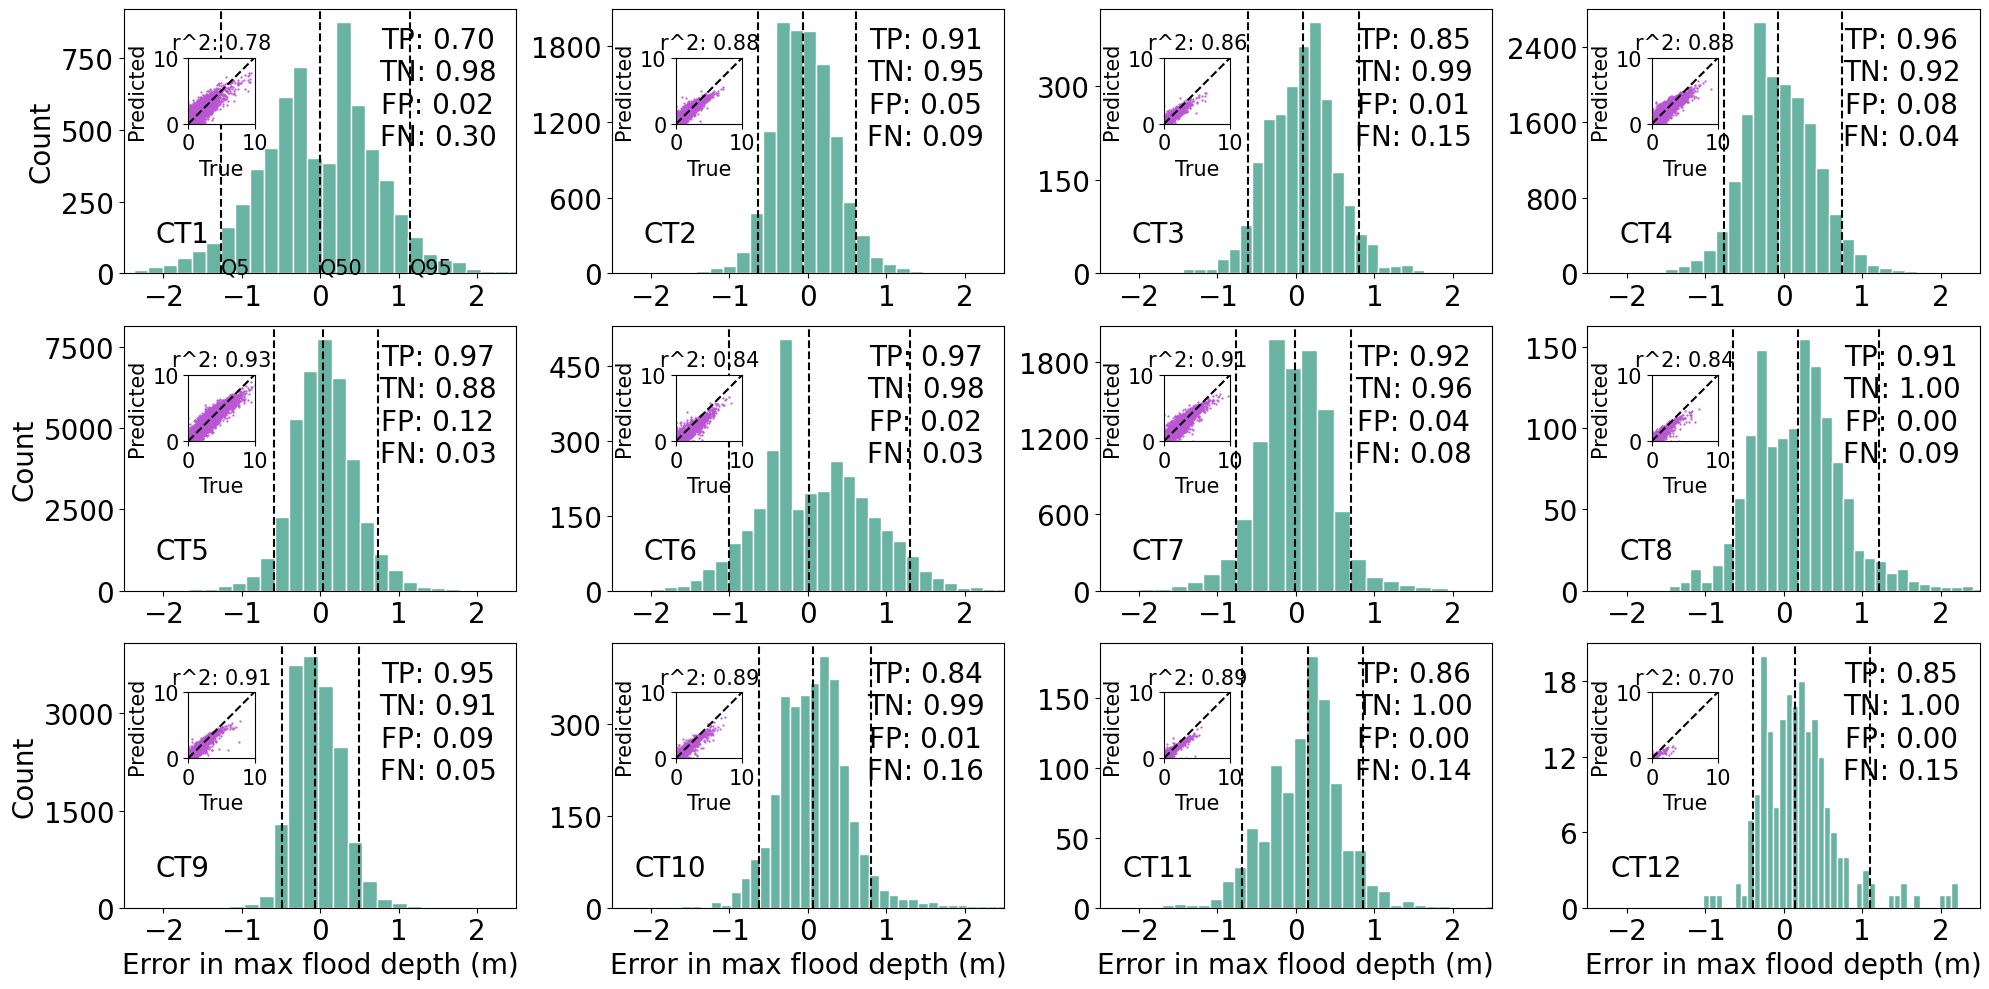

In [11]:
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import xarray as xr
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"
reg = 'CT'
if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
    control_points =  [[37.5022,15.0960],
            [37.48876,15.08936],
            [37.47193,15.07816],
            [37.46273,15.08527],
            [37.46252,15.08587],
            [37.45312,15.07874],
            [37.42821,15.08506],
            [37.40958,15.08075],
            [37.38595,15.08539],
            [37.35084,15.08575],
            [37.33049,15.07029],
            [37.40675,15.05037]]
    
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']
    control_points = [[37.01,15.29],
            [37.06757,15.28709],
            [37.05266,15.26536],
            [37.03211,15.28632]]
mask_size = list_size[0]
train_size = list_size[1]

def get_idx_from_latlon(locations,reg,MLDir,SimDir,mask_size):  
    #get first event to get lat lon
    firstevent = np.loadtxt(f'{MLDir}/data/events/sample_events53550.txt',dtype='str')[0]
    D_grids = xr.open_dataset(f'{SimDir}/{firstevent}/{reg}_flowdepth.nc')
    zero_mask = np.load(f'{MLDir}/data/processed/zero_mask_{reg}_{mask_size}.npy')
    non_zero_list = np.argwhere(~zero_mask).tolist()

    #iterate over list locations
    indices = []
    for loc in locations: 
        #get index of lat lon
        lat_idx = np.argmin(np.abs(D_grids.lat.values - loc[0]))
        lon_idx = np.argmin(np.abs(D_grids.lon.values - loc[1]))

        #get idx in non zero mask list from lat_idx and lon_idx
        idx = non_zero_list.index([lat_idx,lon_idx])
        indices.append(idx)

    # return lat_idx, lon_idx, idx
    print(indices)
    return indices

threshold = 0.2

#keep every second element from the list
# control_points = control_points[::1]
locindices = get_idx_from_latlon(control_points,reg,MLDir,SimDir,mask_size)

true_pred_er = pd.read_csv(f'{MLDir}/model/{reg}/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_{train_size}_true_pred_er_combined.csv')
test = pd.read_csv(f'{MLDir}/model/{reg}/out/model_direct_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv', sep=",")['split']
test = test == 'test'
#keep every second column from the dataframe
# true_pred_er = true_pred_er.iloc[:,::2]
#filter all columns with column name starting with E of true_pred_er
er_list = true_pred_er.iloc[:,true_pred_er.columns.str.startswith('E')].values 
#remove first and last column 
true_pred_er = true_pred_er.iloc[:,1:-1].values
true_pred_er = true_pred_er[test]
fig, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=False)
common_xlim = (-2.5, 2.5)
common_inset_xlim = (0, 10)
common_inset_ylim = (0, 10)
font_size_main = 20
font_size_inset = 15
num_bins = 40

for i, ax in enumerate(axes.flatten()):
    if i >= len(locindices):
        ax.axis('off')
        continue

    errors = er_list[er_list[:, i] != 0, i]
    
    ax.hist(errors, bins=num_bins, edgecolor='white',color='#69b3a2',alpha=1)
    ax.set_xlim(common_xlim)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))  
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) 
    ax.xaxis.set_tick_params(labelsize=font_size_main)
    ax.yaxis.set_tick_params(labelsize=font_size_main)
    marks=[5, 50, 95]
    if len(errors) != 0:
        quantiles = np.percentile(errors, marks)
        for q in quantiles:
            ax.axvline(q, color='k', linestyle='--', label=f'Q{int(q)}')
            #mark label on top of axis
    if i==0:
        for j in [0,1,2]:
            ax.text(quantiles[j], 1, f"Q{str(marks[j])}", 
                    fontsize=font_size_inset, color='k')
    
    neve = np.count_nonzero(true_pred_er[:, i] > threshold)
    neve_recon = np.count_nonzero(true_pred_er[:, i + len(locindices)] > threshold)
    
    if neve == 0:
        TP = FN = -999
    else:
        TP = np.count_nonzero((true_pred_er[:, i] > threshold) & 
                              (true_pred_er[:, i + len(locindices)] > threshold)) / neve
        FN = np.count_nonzero((true_pred_er[:, i] > threshold) & 
                              (true_pred_er[:, i + len(locindices)] <= threshold)) / neve
    
    TN = np.count_nonzero((true_pred_er[:, i] <= threshold) & 
                          (true_pred_er[:, i + len(locindices)] <= threshold)) / (len(true_pred_er[:, i]) - neve)
    FP = np.count_nonzero((true_pred_er[:, i] <= threshold) & 
                          (true_pred_er[:, i + len(locindices)] > threshold)) / (len(true_pred_er[:, i]) - neve)
    
    ax.text(0.15, 0.15, f"CT{i+1}", horizontalalignment='center', 
            verticalalignment='center', transform=ax.transAxes, 
            fontsize=font_size_main, color='k')
    ax.text(0.8, 0.7, f"TP: {TP:.2f}\nTN: {TN:.2f}\nFP: {FP:.2f}\nFN: {FN:.2f}", 
            horizontalalignment='center', verticalalignment='center', 
            transform=ax.transAxes, fontsize=font_size_main)

    if i > 7:
        ax.set_xlabel('Error in max flood depth (m)', fontsize=font_size_main)
    if i in [0,4,8,12]:
        ax.set_ylabel('Count', fontsize=font_size_main)
    
    # Inset scatter plot
    axins = inset_axes(ax, width="25%", height="25%", loc='upper left', borderpad=3.5)
    axins.plot([0, 1], [0, 1], transform=axins.transAxes, color='k', linestyle='--')
    axins.scatter(true_pred_er[:, i], true_pred_er[:, i + len(locindices)], 
                  marker='o', color='mediumorchid', label='Max Inun Depth', s=0.33)
    axins.set_title(f'r^2: {r2_score(true_pred_er[:, i], true_pred_er[:, i + len(locindices)]):.2f}',fontsize=font_size_inset)
    axins.set_xlim(common_inset_xlim)
    axins.set_ylim(common_inset_ylim)
    axins.set_xticks([0, 10])
    axins.set_yticks([0, 10])
    axins.set_xlabel('True', fontsize=font_size_inset)
    axins.set_ylabel('Predicted', fontsize=font_size_inset)
    axins.set_aspect('equal', adjustable='box')
    axins.tick_params(axis='x', labelsize=font_size_inset)
    axins.tick_params(axis='y', labelsize=font_size_inset)

plt.tight_layout()
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/error_test_combined_{reg}_{train_size}.png', transparent=False) 

[29720, 202349, 153030, 94497]


/tmp/ipykernel_3168453/2457218230.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


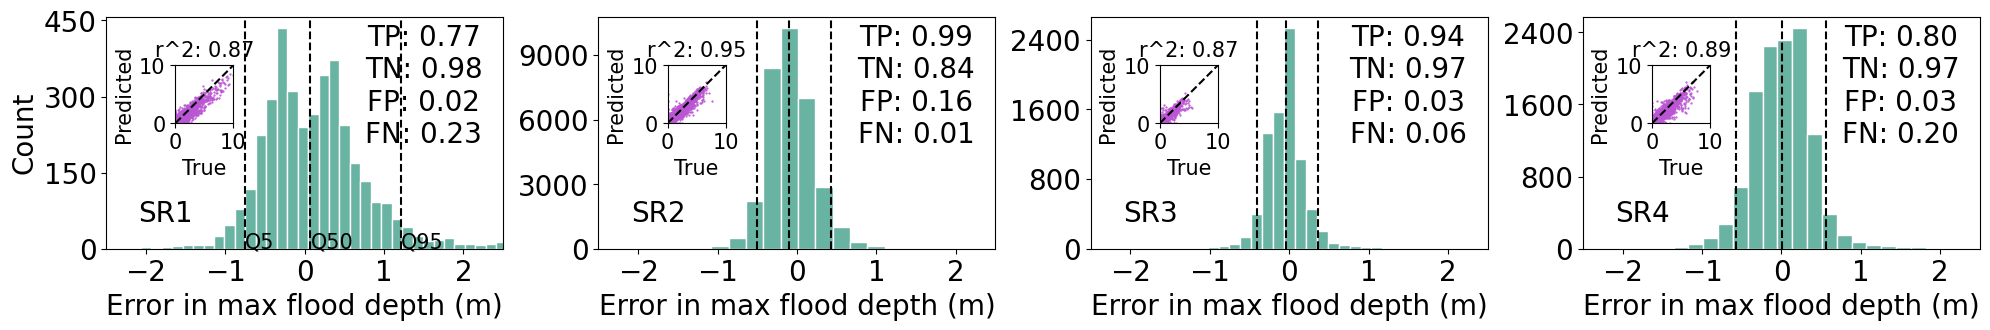

In [12]:
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import xarray as xr
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
SimDir = "/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/simu/"
reg = 'SR'
if reg == 'CT':
    columnname = str(38)
    list_size = ['892','1658','3454','7071']  
    control_points =  [[37.5022,15.0960],
            [37.48876,15.08936],
            [37.47193,15.07816],
            [37.46273,15.08527],
            [37.46252,15.08587],
            [37.45312,15.07874],
            [37.42821,15.08506],
            [37.40958,15.08075],
            [37.38595,15.08539],
            [37.35084,15.08575],
            [37.33049,15.07029],
            [37.40675,15.05037]]
    
elif reg == 'SR':
    columnname = str(54)
    list_size = ['961','1773','3669','6941']
    control_points = [[37.01,15.29],
            [37.06757,15.28709],
            [37.05266,15.26536],
            [37.03211,15.28632]]
mask_size = list_size[0]
train_size = list_size[1]

def get_idx_from_latlon(locations,reg,MLDir,SimDir,mask_size):  
    #get first event to get lat lon
    firstevent = np.loadtxt(f'{MLDir}/data/events/sample_events53550.txt',dtype='str')[0]
    D_grids = xr.open_dataset(f'{SimDir}/{firstevent}/{reg}_flowdepth.nc')
    zero_mask = np.load(f'{MLDir}/data/processed/zero_mask_{reg}_{mask_size}.npy')
    non_zero_list = np.argwhere(~zero_mask).tolist()

    #iterate over list locations
    indices = []
    for loc in locations: 
        #get index of lat lon
        lat_idx = np.argmin(np.abs(D_grids.lat.values - loc[0]))
        lon_idx = np.argmin(np.abs(D_grids.lon.values - loc[1]))

        #get idx in non zero mask list from lat_idx and lon_idx
        idx = non_zero_list.index([lat_idx,lon_idx])
        indices.append(idx)

    # return lat_idx, lon_idx, idx
    print(indices)
    return indices

threshold = 0.2

#keep every second element from the list
# control_points = control_points[::1]
locindices = get_idx_from_latlon(control_points,reg,MLDir,SimDir,mask_size)

true_pred_er = pd.read_csv(f'{MLDir}/model/{reg}/out/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_true_pred_er_combined.csv')
test = pd.read_csv(f'{MLDir}/model/{reg}/out/model_coupled_off[64, 128, 256]_on[16, 128, 128]_{train_size}_compile_combined.csv', sep=",")['split']
test = test == 'test'
#keep every second column from the dataframe
# true_pred_er = true_pred_er.iloc[:,::2]
#filter all columns with column name starting with E of true_pred_er
er_list = true_pred_er.iloc[:,true_pred_er.columns.str.startswith('E')].values 
#remove first and last column 
true_pred_er = true_pred_er.iloc[:,1:-1].values
true_pred_er = true_pred_er[test]

fig, axes = plt.subplots(1, 4, figsize=(20, 3.4), sharex=False)
common_xlim = (-2.5, 2.5)
common_inset_xlim = (0, 10)
common_inset_ylim = (0, 10)
font_size_main = 20
font_size_inset = 15
num_bins = 40

for i, ax in enumerate(axes.flatten()):
    if i >= len(locindices):
        ax.axis('off')
        continue

    errors = er_list[er_list[:, i] != 0, i]
    
    ax.hist(errors, bins=num_bins, edgecolor='white',color='#69b3a2',alpha=1)
    ax.set_xlim(common_xlim)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))  
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) 
    ax.xaxis.set_tick_params(labelsize=font_size_main)
    ax.yaxis.set_tick_params(labelsize=font_size_main)
    marks=[5, 50, 95]
    if len(errors) != 0:
        quantiles = np.percentile(errors, marks)
        for q in quantiles:
            ax.axvline(q, color='k', linestyle='--', label=f'Q{int(q)}')
            #mark label on top of axis
    if i==0:
        for j in [0,1,2]:
            ax.text(quantiles[j], 1, f"Q{str(marks[j])}", 
                    fontsize=font_size_inset, color='k')
    
    neve = np.count_nonzero(true_pred_er[:, i] > threshold)
    neve_recon = np.count_nonzero(true_pred_er[:, i + len(locindices)] > threshold)
    
    if neve == 0:
        TP = FN = -999
    else:
        TP = np.count_nonzero((true_pred_er[:, i] > threshold) & 
                              (true_pred_er[:, i + len(locindices)] > threshold)) / neve
        FN = np.count_nonzero((true_pred_er[:, i] > threshold) & 
                              (true_pred_er[:, i + len(locindices)] <= threshold)) / neve
    
    TN = np.count_nonzero((true_pred_er[:, i] <= threshold) & 
                          (true_pred_er[:, i + len(locindices)] <= threshold)) / (len(true_pred_er[:, i]) - neve)
    FP = np.count_nonzero((true_pred_er[:, i] <= threshold) & 
                          (true_pred_er[:, i + len(locindices)] > threshold)) / (len(true_pred_er[:, i]) - neve)
    
    ax.text(0.15, 0.15, f"SR{i+1}", horizontalalignment='center', 
            verticalalignment='center', transform=ax.transAxes, 
            fontsize=font_size_main, color='k')
    ax.text(0.8, 0.7, f"TP: {TP:.2f}\nTN: {TN:.2f}\nFP: {FP:.2f}\nFN: {FN:.2f}", 
            horizontalalignment='center', verticalalignment='center', 
            transform=ax.transAxes, fontsize=font_size_main)

    if i >= 0:
        ax.set_xlabel('Error in max flood depth (m)', fontsize=font_size_main)
    if i in [0,4,8,12]:
        ax.set_ylabel('Count', fontsize=font_size_main)
    
    # Inset scatter plot
    axins = inset_axes(ax, width="25%", height="25%", loc='upper left', borderpad=3.5)
    axins.plot([0, 1], [0, 1], transform=axins.transAxes, color='k', linestyle='--')
    axins.scatter(true_pred_er[:, i], true_pred_er[:, i + len(locindices)], 
                  marker='o', color='mediumorchid', label='Max Inun Depth', s=0.33)
    # axins.text(0.5, 10.1, f'r^2: {r2_score(true_pred_er[:, i], true_pred_er[:, i + len(locindices)]):.2f}', 
    #            fontsize=font_size_inset)
    axins.set_title(f'r^2: {r2_score(true_pred_er[:, i], true_pred_er[:, i + len(locindices)]):.2f}',fontsize=font_size_inset)
    axins.set_xlim(common_inset_xlim)
    axins.set_ylim(common_inset_ylim)
    axins.set_xticks([0, 10])
    axins.set_yticks([0, 10])
    axins.set_xlabel('True', fontsize=font_size_inset)
    axins.set_ylabel('Predicted', fontsize=font_size_inset)
    axins.set_aspect('equal', adjustable='box')
    axins.tick_params(axis='x', labelsize=font_size_inset)
    axins.tick_params(axis='y', labelsize=font_size_inset)

plt.tight_layout()
plt.savefig(f'{MLDir}/scripts/PaperIIPlots/plots/error_test_combined_{reg}_{train_size}.png', transparent=False) 

Check model parameters and size

In [3]:
import sys, os
sys.path.append('../PaperIIRuns/')
from torchsummary import summary
import torch
model = torch.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/model_couple_off[64, 128, 256]_on[16, 128, 128]_minepoch_1773.pt",map_location=torch.device('cpu'))
model.eval()
summary(model,[(5,480),(224124,1),(948,1300)]) #SR

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 64, 480]           1,024
         LeakyReLU-2              [-1, 64, 480]               0
         MaxPool1d-3              [-1, 64, 240]               0
            Conv1d-4             [-1, 128, 240]          24,704
         LeakyReLU-5             [-1, 128, 240]               0
         MaxPool1d-6             [-1, 128, 120]               0
            Conv1d-7             [-1, 256, 120]          98,560
         LeakyReLU-8             [-1, 256, 120]               0
         MaxPool1d-9              [-1, 256, 60]               0
          Flatten-10                [-1, 15360]               0
           Linear-11                   [-1, 64]         983,104
           Conv2d-12         [-1, 16, 474, 650]             160
        LeakyReLU-13         [-1, 16, 474, 650]               0
        MaxPool2d-14         [-1, 16, 2

In [4]:
import sys, os
sys.path.append('../PaperIIRuns/')
from torchsummary import summary
import torch
model = torch.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/model_couple_off[64, 128, 256]_on[16, 128, 128]_minepoch_1658.pt",map_location=torch.device('cpu'))
model.eval()
summary(model,[(9,480),(518665,1),(912,2224)]) #CT

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 64, 480]           1,792
         LeakyReLU-2              [-1, 64, 480]               0
         MaxPool1d-3              [-1, 64, 240]               0
            Conv1d-4             [-1, 128, 240]          24,704
         LeakyReLU-5             [-1, 128, 240]               0
         MaxPool1d-6             [-1, 128, 120]               0
            Conv1d-7             [-1, 256, 120]          98,560
         LeakyReLU-8             [-1, 256, 120]               0
         MaxPool1d-9              [-1, 256, 60]               0
          Flatten-10                [-1, 15360]               0
           Linear-11                   [-1, 64]         983,104
           Conv2d-12        [-1, 16, 456, 1112]             160
        LeakyReLU-13        [-1, 16, 456, 1112]               0
        MaxPool2d-14         [-1, 16, 2